<img src="Figures/logo_trans.png" width="180px" alt="LyonHPC" />
<img width="200px" src="Figures/python-logo.gif" alt="LyonHPC"/>


# Précision et validation

<img src="cloud_precision.png" alt="sommaire" width="300px"/>

In [1]:
%matplotlib inline
from IPython.display import HTML,display,IFrame
from IPython.display import YouTubeVideo,Markdown,Video

## Erreur de représentation

*Les nombres réels n'ont pas de représentation exacte sur un ordinateur*

### Exemple préliminaire

Calcul de la somme $S_n$ de la série convergente:

$$S_n = \sum_{i=0}^n \frac{x^i}{i!} $$

#### Algorithme

    Algorithme serie(x,n)
         term  = 1.
         somme = 1.
         pour i de 1 a n (exclu)
            term = term*x/i
            somme = somme + term
         fin pour
         Serie = somme

#### Programme Python

In [2]:
def serie(x,n) :
    term = 1.0
    somme = term
    for i in range(1,n):
        term = term*x/i
        somme = somme + term
    return somme

#### Applications

In [3]:
from numpy import exp
x = 1.0
print("Pour x=",x," serie=",serie(x,100)," exp(x)=",exp(x))
x = 100.0
print("Pour x=",x," serie=",serie(x,1000)," exp(x)=",exp(x))

Pour x= 1.0  serie= 2.7182818284590455  exp(x)= 2.718281828459045
Pour x= 100.0  serie= 2.6881171418161336e+43  exp(x)= 2.6881171418161356e+43


In [4]:
x = -1.0
print("Pour x=",x," serie=",serie(x,100)," exp(x)=",exp(x))
x = -100.0
print("Pour x=",x," serie=",serie(x,1000)," exp(x)=",exp(x))

Pour x= -1.0  serie= 0.36787944117144245  exp(x)= 0.36787944117144233
Pour x= -100.0  serie= -2.9137556468915326e+25  exp(x)= 3.720075976020836e-44


Pour $x < 0$ , la série converge mais numériquement le calcul diverge à cause des erreurs d’arrondis.

#### Solution: utilisation de la propriété $e^{-x} = 1/e^x $

In [6]:
x = -100.0
print("Pour x=",x," serie=",1./serie(-x,1000)," exp(x)=",exp(x))

Pour x= -100.0  serie= 3.7200759760208386e-44  exp(x)= 3.72007597602e-44


#### Exercice
On peut améliorer la précision du calcul en notant que pour $x>0$, on peut écrire:

$$e^x = (e^{x_0})^n \mbox{ avec } 0\le x_0 \le1 $$

Réécrire l'algorithme précédent en utilisant cette propriété.


### Représentation des nombres sur un ordinateur

- nombre entier exacte (32 bits): $-2^{31}\le n \le 2^{31}$

- nombre réel: mantisse + exposant:

Réel $a\neq\ 0$
  normalisé = mantisse+exposant 
  
  $$\forall\ a\in\mathbb{R}\,\,\, a=\pm\ 10^{q}\sum_{i=1}^{\infty}a_{i}.10^{-i}\mbox{ avec }a_{1}\neq\ 0$$
 
  représentation flottante (si $-N\leq\ q\leq\ M$) 
  
 $$fl(a)=\pm\ 10^{q}\sum_{i=1}^{t}a_{i}.10^{-i}$$
 
- simple précision 32 bits: $t=7$,  $-45<q<38$

- double précision 64 bits: $t=15$, $-324<q<308$
  
#### Exemple

In [5]:
x = 1.
print(x)
s = x+x+x
print(s == 3.)

1.0
True


In [6]:
x =0.1
print(x)
s = x+x+x
print(s == 0.3)

0.1
False


In [7]:
print("s=",s)
print("s=",repr(s))

s= 0.30000000000000004
s= 0.30000000000000004


## Précision des calculs

### Précision machine $\epsilon$
 
$$\frac{\left\Vert a-fl(a)\right\Vert }{\left\Vert a\right\Vert }\le\epsilon$$

### Algorithme de calcul de la précision machine

    Algorithme Precision()
        eps = 1.
        tant que 1. + eps > 1.
            eps = eps/2
        fin tant que
        Precision = 2*eps

### Programme Python

In [8]:
def Precision():
    """ calcul la precision machine """
    eps = 1.0
    while (1.+eps) > 1.0 :
        eps = eps/2.
    return 2*eps

print("Precision machine = ",Precision())


Precision machine =  2.220446049250313e-16


## Erreurs numériques

- non associativité de l'addition et soustraction

- formule exacte $\leadsto$ résultats numériques faux

- absorption $x + y = x$  si $y \ll x$

### Exemple: racine d'une équation du 2nd degré

$$x=\frac{-b\mp\sqrt{b^{2}-4ac}}{2a}$$
 
#### programme Python de base

In [10]:
from numpy import sqrt
a = 1.e-8
b = -2.
c = 1.e-8

x1 = (-b + sqrt(b*b-4*a*c))/(2*a)
x2 = (-b - sqrt(b*b-4*a*c))/(2*a)

print("x1=",x1, "x2=",x2)
print("x1*x2=",x1*x2,"# produit=",c/a)

x1= 200000000.0 x2= 1.1102230246251565e-08
x1*x2= 2.220446049250313 # produit= 1.0


#### meilleur approximation

In [11]:
x2 = c/a/x1
print("x1=",x1, "x2=",x2)
print("x1*x2=",x1*x2,"= produit=",c/a)

x1= 200000000.0 x2= 5e-09
x1*x2= 1.0 = produit= 1.0


### Calcul d'erreurs

#### règles sur les erreurs

  $$\Delta(x+y)=\Delta x+\Delta y$$
  $$\Delta(x-y)=\Delta x+\Delta y$$
  $$\Delta(x*y)=\left|y\right|\Delta x+\left|x\right|\Delta y$$
  $$\Delta(\frac{x}{y})=\frac{\left|y\right|\Delta x+\left|x\right|\Delta y}{y^{2}}$$
  
#### condition sur l' erreur relative

   $$\frac{\Delta x}{|x|} \le \epsilon $$

## Conditionnement et erreurs d'approximation

### sensibilité aux erreurs
**Conditionnement** sensibilité du résultat à une petite variation des données. 

Problème mal conditionné=grande sensibilité vis à vis des données.

**Stabilité** sensibilité de l'algorithme vis a vis des erreurs numériques

### Erreurs d'approximation

Soit $U^h$ une approximation de la solution $U_{ex}$  fonction d'un petit paramètre d'approximation $h$:

$$\lim_{h \rightarrow 0}{U^h} = U_{ex} $$

Erreur $E(h)$

$$ E(h) =  \left\Vert U^h - U_{ex} \right\Vert \rightarrow 0 $$
 
#### Ordre d'approximation
**Ordre $O(h^{n})$**

- La fonction $E(h)$ est en $O(h^{n})$ s'il existe une constante $C>0$ telle que $\left|E(h)\right|<Ch^{n}$
  

**Approximation d'ordre n**: 

- si l'erreur est en $O(h^{n})$, alors l' approximation est d'ordre n


### Exemple: calcul de $e^a$ avec des tables pour $0 < a < 1$

On précalcule  $n+1$ valeurs $l_k=\log(1 + 10^{-k})$ ( pour $k=0,n$ ) 

On a donc $e^{l_k} = 1 + 10^{-k}$

On décompose ensuite $a$ sous la forme

$$ a = \sum_{k=0}^{n} a_k l_k + \epsilon \mbox{ avec } a_k\in \mathbb{N} \mbox{ et } |\epsilon| \lt 10^{-n}$$

ce qui donne (en utilisant $e^{a+b}=e^a e^b $) :

$$ e^a = \left[\prod_{k=0}^{n}\left(1 + 10^{-k}\right)^{a_k}\right] e^\epsilon$$

En approximant $e^\epsilon \simeq 1+ \epsilon$, on obtiens une approximation de $e^a$ 

$$ e^a \simeq \left[\prod_{k=0}^{n}\left(1 + 10^{-k}\right)^{a_k}\right] ( 1 + \epsilon) $$

avec une erreur relative  $\epsilon^2$ 

$$ \frac{\Delta e^a}{e^a} = \frac {e^\epsilon- 1 - \epsilon}{e^\epsilon} \simeq \theta(\epsilon^2)$$


### Algorithme: approximation de exp(a) à l'aide de tables

    Algorithme Exp(a)
        n = 8  # nbre de valeurs de la table
        L = [ln(1),ln(1+0.1),ln(1+0.01),...ln(1+10^-7)]
        x = a  # valeur a decomposer (a, a-a0*l0, a-a0*l0-a*l1,...)
        y = 1  # valeur de exp(a)
        pour k de 0 a n-1
           # Calcul de ak par decomposition 
           # de x = a - a0*L[0]-a1*L[1]-..ak-1*L[k_1]
           ak = 0
           tant que x>L[k] faire
               x = x - L[k]
               y = y*(1+10^-k)
               ak = ak + 1
           fin calcul ak 
         fin boucle k
         # prise en compte du reste ici x
         y = y*(1+x)
         retour y

### Programme Python

In [12]:
from numpy import exp,log,log1p
# table précalculée
n=8
L=[log(1+10**(-k)) for k in range(n)]
# calcul exp(a)
def Exp(a):
    """ calcul approximation y de exp(a)"""
    global L,n
    x=a
    y=1.
    dixmk=1. # puissance 10**(-k)
    for k in range(n):
        while (L[k] <= x):
            x = x - L[k]
            y = y + y*dixmk
        dixmk = dixmk/10.
    y=y*(1+x)
    return y
# test
a=0.8
print("Erreur relative = ",(exp(a)-Exp(a))/exp(a))
a=0.00008
print("Erreur relative = ",(exp(a)-Exp(a))/exp(a))

Erreur relative =  1.3967950124629484e-15
Erreur relative =  4.4405368413432215e-16


### comparaison avec le calcul utilisant les séries entières

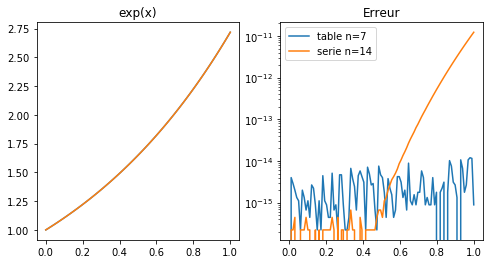

In [13]:
import numpy as np
import matplotlib.pyplot as plt
X = np.linspace(0,1.,100)
Ye = exp(X)
Ya = [Exp(x) for x in X]
Ys = [serie(x,14) for x in X]
# tracer
plt.figure(figsize=(8,4))
plt.subplot(1,2,1)
plt.plot(X,Ye,X,Ya)
plt.title("exp(x)")
plt.subplot(1,2,2)
plt.plot(X,abs(Ya-Ye),label="table n=7")
plt.plot(X,abs(Ys-Ye),label="serie n=14")
plt.legend(loc=0)
plt.title("Erreur")
plt.yscale('log')
plt.show()

**Remarques**

-  on peut améliorer la précision en utilisant la fonction numpy **log1p(x)** qui calcul log(1+x) avec une plus grande précision pour x petit
- **attention** le calcul précis des fonctions élémentaires est un problème complexe (voir l'article sur la précsion de l'instruction **fsin** des processeurs Intel) 

### Exercice:
Utiliser le principe de l'algorithme précédent pour calculer $log(a)$ pour $a>1$.
On pourra décomposer $a$ sous la forme:

$$a = \left[\prod_{k=0}^{n}\left(1 + 10^{-k}\right)^{a_k}\right] (1+\epsilon)$$
    
En déduire une approximation de $log(a)$ avec une erreur relative de $\epsilon^2$
    

## Vérification des calculs

- une simulation numérique calcule une approximation

- toute simulation numérique doit être validée

- vérification et validation font partie intégrante du calcul scientifique

La validation d'une simulation numérique peut utiliser  

- une vérification de la convergence

- une comparaison avec une solution analytique ou une solution de référence

### validation de la simulation d'alunissage

**comparaison avec une solution analytique**

Dans la modélisation de alunissage on a utiliser une approximation de la solution de l'équation du mouvement:

$$ \frac{d^2 Z}{dt^2} = -g + \frac{Qe*Ue}{M_0-Q_e*t}$$

sous la forme

$$ Z = Z_0 - V_0 t - g \frac{t^2}{2} + t U_e (\frac{X}{2} + \frac{X^2}{6} + \frac{X^3}{12}  + \frac{X^4}{20} + \frac{X^5}{30})$$

avec $X=t/t_0$ et $t_0=M_0/Q_e$ 

Cette équation admet une solution analytique:

$$ Z_e = Z_0 - V_0 t - g \frac{t^2}{2} + U_e t_0 (1-X)ln(1-X) + U_e t $$

L'approximation correspond à un DL de $ln(1-X)$ a l'ordre 5, et
l'erreur doit etre en $\theta(X^7)$


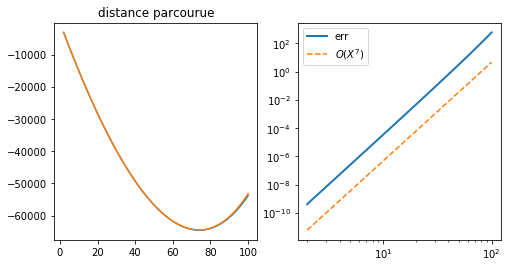

In [14]:
import numpy as np
import matplotlib.pyplot as plt
# constantes en unité SI (kg/m/s)
g  = 1.6     # gravité
Ue = 2900.   # vitesse d'ejection
Z0 = 190000. # position
V0 = 1580.   # et vitesse
M0 = 15000.  # masse initiale du LEM
Me = 8000.   # dont une masse de fuel
t  = 0.      # temps simulation
dt = 10.     # pas en temps 
Qe = 90.     # poussée
t0 = M0/Qe
# calcul distance parcourue DZ
def DZ(t):
    X = t/t0
    dZ = - V0*t - g*t*t/2. + Ue*t*(X/2. + X*X/6. + X**3/12. + X**4/20. + X**5/30.)
    return dZ
# solution exacte
def DZe(t):
    X = t/t0
    dZ = - V0*t - g*t*t/2. + Ue*(t0-t)*np.log(1-X) + Ue*t
    return dZ
# calcul de l'erreur
T  = np.linspace(2.,10*dt,100)
Z  = np.array([DZ(t) for t in T])
Ze = np.array([DZe(t) for t in T])
Err7 = np.array([t0*(t/t0)**7 for t in T])
#
plt.figure(figsize=(8,4))
plt.subplot(1,2,1)
plt.plot(T,Z,T,Ze)
plt.title("distance parcourue")
plt.subplot(1,2,2)
plt.plot(T,abs(Z-Ze),lw=2,label='err')
plt.plot(T,Err7,'--',label='$O(X^7)$')
plt.legend(loc=0)
plt.xscale('log')
plt.yscale('log')
plt.show()

### Validation du calcul de $exp(a)$ avec $n$ valeurs tabulées

**vérification de la convergence**

erreur relative $err \simeq \epsilon^2$ avec $\epsilon \lt 10^{-n}$

#### programme Python

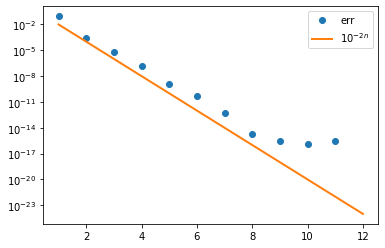

In [15]:
import numpy as np
import matplotlib.pyplot as plt
# calcul exp(a) avec une precision 10^-2n
def Exp(a,n):
    """ calcul approximation y de exp(a)"""
    L=[np.log(1+10**(-k)) for k in range(n)]
    x=a
    y=1.
    dixmk=1. # puissance 10**(-k)
    for k in range(n):
        while (L[k] <= x):
            x = x - L[k]
            y = y + y*dixmk
        dixmk = dixmk/10.
    y=y*(1+x)
    return y
#
n=12
N=range(1,n+1)
Y=[10**(-2*k) for k in N]
Err=np.zeros(n)
a=0.5
for i in range(n):
    Err[i] = abs(Exp(a,i+1)-np.exp(a))/np.exp(a)
plt.plot(N,Err,'o',label="err")
plt.plot(N,Y,'-',lw=2,label="$10^{-2n}$")
plt.yscale('log')
plt.legend(loc=0)
plt.show()

## <a href="#sommaire">Bibliographie</a><a name="section2" />


1. [Calcul des fonctions usuelles sur une calculatrice (blog prépa Dupuis de Lome)](http://mp.cpgedupuydelome.fr/document.php?doc=Article%20-%20Calcul%20des%20fonctions%20usuelles%20par%20la%20calculatrice.txt)

2. [Calcul scientifique (J. Erhel INRIA -Rennes)](https://www.irisa.fr/sage/jocelyne/cours/HPC/prec-1101.pdf)

3. [Intel Underestimates Error Bounds by 1.3 quintillion for the fsin instruction](http://randomascii.wordpress.com/2014/10/09/intel-underestimates-error-bounds-by-1-3-quintillion)

4. [Collection of software bugs](http://www5.in.tum.de/~huckle/bugse.html)

5. J. P. Demailly. "Analyse Numérique et Equations Différentielles", PUG, 1994.


## FIN de la leçon 

<img src="cloud_precision.png" alt="sommaire" width="300px"/>